In [1]:
%matplotlib inline

In [16]:
from scipy import integrate
from scipy.constants import k as k_B

\begin{align}
\epsilon &= E / \Delta \\
\gamma &= \Gamma / \Delta \\
\omega &= \hbar \Omega / \Delta \\
\tau &= k_\mathrm{B} T_\mathrm{c} / \Delta \\
\end{align}

In [3]:
def n(epsilon, gamma):
    return np.sign(epsilon) * ((epsilon + 1j * gamma) /
                               np.sqrt((epsilon + 1j * gamma)**2 - 1))

def p(epsilon, gamma):
    return np.sign(epsilon) * (1 /
                               np.sqrt((epsilon + 1j * gamma)**2 - 1))

def g1(epsilon, gamma, omega):
    return (n(epsilon, gamma).real * n(epsilon + omega, gamma).real +
            p(epsilon, gamma).real * p(epsilon + omega, gamma).real)

def g2(epsilon, gamma, omega):
    return (n(epsilon, gamma).imag * n(epsilon + omega, gamma).real +
            p(epsilon, gamma).imag * p(epsilon + omega, gamma).real)

def K1(epsilon, gamma, omega):
    return (1 / omega) * (n(epsilon, gamma).real * (n(epsilon + omega, gamma).real - n(epsilon - omega, gamma).real) +
                          p(epsilon, gamma).real * (p(epsilon + omega, gamma).real - p(epsilon - omega, gamma).real))

def K2(epsilon, gamma, omega):
    return (2 / omega) * (n(epsilon - omega, gamma).imag * n(epsilon, gamma).real +
                          p(epsilon - omega, gamma).imag * p(epsilon, gamma).real)

def fermi_dirac(epsilon, tau):
    return 1 / (np.exp(epsilon / tau) + 1)

def fd_K1(epsilon, gamma, omega, tau):
    return fermi_dirac(epsilon, tau) * K1(epsilon, gamma, omega)

def fd_K2(epsilon, gamma, omega, tau):
    return fermi_dirac(epsilon, tau) * K2(epsilon, gamma, omega)

For $\gamma = 0.01$, $\tau = 0.1$ is already close to the crossover where $\sigma_2$ is sensitive only to the subgap states near $E = 0$ instead of the response function peaks near $E = \Delta$. Be careful!

In [20]:
ee = np.linspace(-2, 2, 10000)
gamma = 0.001
omega = 0.1
tau = 0.1

In [21]:
T_c = 1.2
Delta = 1.76 * k_B * T_c
T = (Delta / k_B) * tau
T

0.21120000000000003

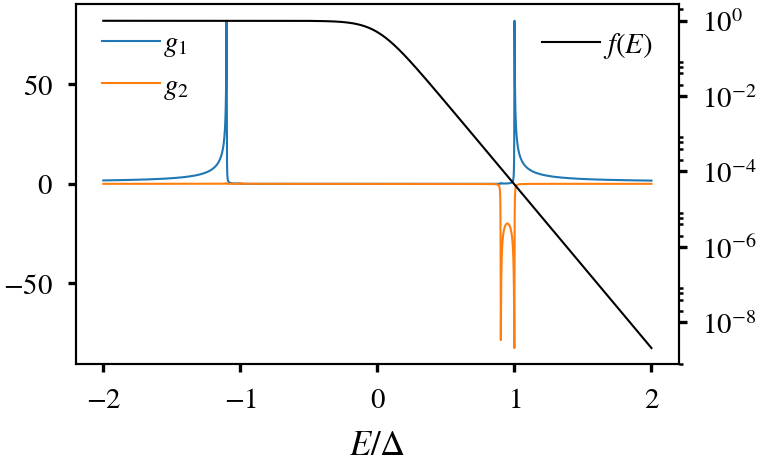

In [22]:
fig, ax = plt.subplots()
f_ax = ax.twinx()
f_ax.set_yscale('log')
ax.set_xlabel('$E / \Delta$')
ax.plot(ee, g1(ee, gamma, omega), label='$g_1$')
ax.plot(ee, g2(ee, gamma, omega), label='$g_2$')
f_ax.plot(ee, fermi_dirac(ee, tau), label='$f(E)$', color='black')
ax.legend(loc='upper left');
f_ax.legend(loc='upper right')

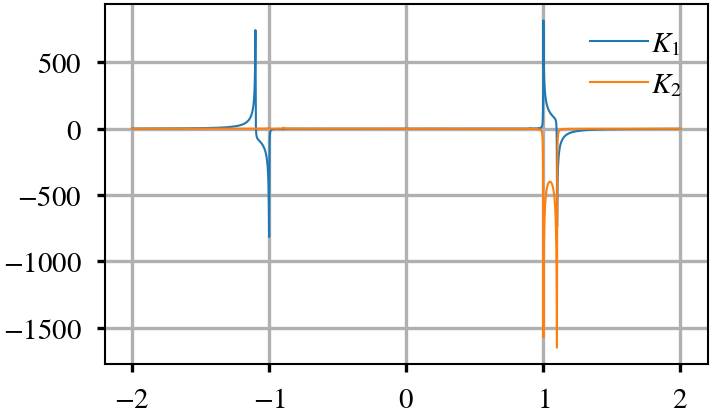

In [23]:
fig, ax = plt.subplots()
ax.plot(ee, K1(ee, gamma, omega), label='$K_1$')
ax.plot(ee, K2(ee, gamma, omega), label='$K_2$')
ax.grid()
ax.legend();

In [24]:
points = (-1 - omega, -1, -1 + omega, 1 - omega, 1, 1 + omega)

In [25]:
1 / 2 * integrate.quad(K2, -2, 2, limit=10000, points=points, args=(gamma, omega))[0]

-30.99366925692746

In [26]:
integrate.quad(K1, -3, 3, limit=10000, points=points, args=(gamma, omega))[0]

0.0

In [27]:
integrate.quad(K1, -2, 0, limit=10000, points=points[:3], args=(gamma, omega))[0]

-1.668960527292609

In [28]:
integrate.quad(K1, 0, 2, limit=10000, points=points[3:], args=(gamma, omega))[0]

1.668960527292609

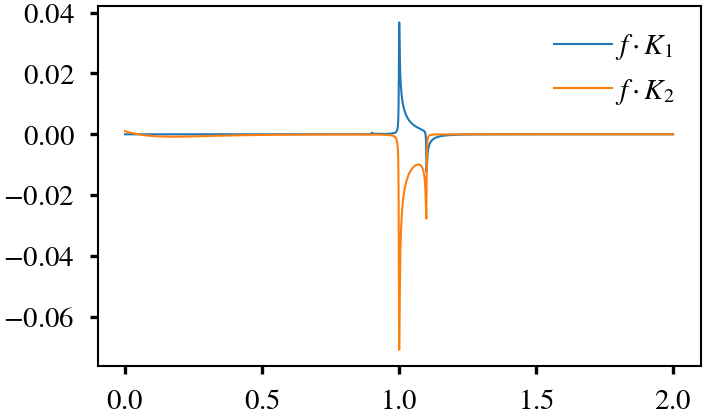

In [29]:
ep = ee[ee >= 0]
fig, ax = plt.subplots()
ax.plot(ep, fd_K1(ep, gamma, omega, tau), label=r'$f \cdot K_1$')
ax.plot(ep, fd_K2(ep, gamma, omega, tau), label=r'$f \cdot K_2$')
ax.legend();

In [30]:
integrate.quad(fd_K1, 0, 5, limit=10000, points=(0, 1 - omega, 1, 1 + omega), args=(gamma, omega, tau))

(0.00046386971301422736, 6.909356714486208e-09)

In [31]:
integrate.quad(fd_K2, -5, 5, limit=10000, points=(0, 1 - omega, 1, 1 + omega), args=(gamma, omega, tau))

(0.37837801425557227, 1.3105795703035529e-08)